### **Lab 4: Predicting a Continuous Target with Regression (Titanic)**
Author: Mahitha Kunta

Date: 04/12/2025

Objective: Predicting fare prices based on Titanic dataset features

#### **Section 1: Import and Inspect the Data**

In [14]:
# Importing the necessary libraries
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [30]:
# Load Titanic dataset directly from seaborn library
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### **Section 2: Data Exploration and Preparation**
2.1 Handle Missing Values and Clean Data

In [31]:
# We can impute missing values for age using the median:
# Fill missing 'age' values with the median (since it's a numerical column)
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
# Drop rows with missing fare
titanic = titanic.dropna(subset=['fare'])

# Create family_size feature
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1


#### **Section 3: Feature Selection and Justification**

In [32]:
# Define feature sets
X1 = titanic[['age']]                 # Case 1
X2 = titanic[['family_size']]        # Case 2
X3 = titanic[['age', 'family_size']] # Case 3

titanic['pclass'] = titanic['pclass'].astype(float)  # Ensure numerical
X4 = titanic[['age', 'pclass']]      # Case 4

y1 = y2 = y3 = y4 = titanic['fare']

#### **Reflection 3:**
**Why might these features affect a passenger’s fare:**
Pclass (Passenger Class): Higher-class tickets (1st class) were significantly more expensive than lower-class tickets (3rd class).
Age: Younger children, especially infants, sometimes had lower fares or shared accommodations.
SibSp & Parch (Family Size): Traveling with family might result in group pricing or shared accommodations, influencing fare.

**List all available features:**
Pclass, Sex, Age, SibSp, Parch, Emarked, Who, Deck, Embark_town, or Alone

**Which other features could improve predictions and why:**
- Cabin (location of stay) could help a lot because rooms located a different decks could have different price levels.
- Sibsp could help has if somone his with family that may indicate how that affects prices vs being alone.

**How many variables are in your Case 4:**
Two being pclass and age

**Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs:**

- Plcass I feel could be a strong indicator of prices since class generally direclty relates with pricing of your tickets
- Sibsp I feel can help as larger groups may get discounts for booking more tickets

#### **Section 4: Train a Regression Model (Linear Regression)**
**4.1 Split the Data**

In [25]:
print(X1_train.isnull().sum())
print(X1_test.isnull().sum())

age    712
dtype: int64
age    179
dtype: int64


In [34]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())

In [35]:
print(titanic['age'].isnull().sum())  # Should be 0

0


In [37]:
# Split data for all four cases
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

**4.2 Create, Train, and Predict Model**

In [38]:
# Train linear regression models for all 4 cases
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions for each case
y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

print("Case 1 (age):")
print(f"Training R²: {r2_score(y1_train, y_pred_train1)}")
print(f"Test R²: {r2_score(y1_test, y_pred_test1)}")

print("\nCase 2 (family_size):")
print(f"Training R²: {r2_score(y2_train, y_pred_train2)}")
print(f"Test R²: {r2_score(y2_test, y_pred_test2)}")

print("\nCase 3 (age, family_size):")
print(f"Training R²: {r2_score(y3_train, y_pred_train3)}")
print(f"Test R²: {r2_score(y3_test, y_pred_test3)}")

print("\nCase 4 (pclass, age):")
print(f"Training R²: {r2_score(y4_train, y_pred_train4)}")
print(f"Test R²: {r2_score(y4_test, y_pred_test4)}")

Case 1 (age):
Training R²: 0.009950688019452314
Test R²: 0.0034163395508415295

Case 2 (family_size):
Training R²: 0.049915792364760736
Test R²: 0.022231186110131973

Case 3 (age, family_size):
Training R²: 0.07347466201590014
Test R²: 0.049784832763073106

Case 4 (pclass, age):
Training R²: 0.30893458196174794
Test R²: 0.31661691734309905


#### **4.3 Report Performance**

In [39]:
# Function to evaluate performance
def evaluate_performance(X, y, case_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

    # Train Linear Regression Model
    lr_model = LinearRegression().fit(X_train, y_train)

    # Predictions
    y_pred_train = lr_model.predict(X_train)
    y_pred_test = lr_model.predict(X_test)

    # Evaluate Performance
    print(f"--- {case_name} ---")
    print("Training R²:", r2_score(y_train, y_pred_train))
    print("Test R²:", r2_score(y_test, y_pred_test))
    print("Test RMSE:", mean_squared_error(y_test, y_pred_test) ** 0.5)
    print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
    print("-" * 30)

# Run evaluations for all cases
evaluate_performance(X1, y1, "Case 1: Age Only")
evaluate_performance(X2, y2, "Case 2: Family Size Only")
evaluate_performance(X3, y3, "Case 3: Age + Family Size")
evaluate_performance(X4, y4, "Case 4: Age + Pclass")

--- Case 1: Age Only ---
Training R²: 0.009950688019452314
Test R²: 0.0034163395508415295
Test RMSE: 37.97164180172938
Test MAE: 25.28637293162364
------------------------------
--- Case 2: Family Size Only ---
Training R²: 0.049915792364760736
Test R²: 0.022231186110131973
Test RMSE: 37.6114940041967
Test MAE: 25.02534815941641
------------------------------
--- Case 3: Age + Family Size ---
Training R²: 0.07347466201590014
Test R²: 0.049784832763073106
Test RMSE: 37.0777586646559
Test MAE: 24.284935030470688
------------------------------
--- Case 4: Age + Pclass ---
Training R²: 0.30893458196174794
Test R²: 0.31661691734309905
Test RMSE: 31.443769640988446
Test MAE: 20.703744560366587
------------------------------


#### **Reflection 4:**
**Did Case 1 overfit or underfit? Explain:**

- Underfit -- Very low R² on both train and test sets means the model does not capture meaningful variance in fare.
  
**Did Case 2 overfit or underfit? Explain:**

- Undefit -- Low R² suggests it’s not a strong predictor. The close train/test scores indicate a weak but consistent model.

**Did Case 3 overfit or underfit? Explain:**

- Slight Underfit -- The test R² (0.0498) is lower than train R² (0.0735), meaning the model might be slightly underfitting but still doesn’t explain much variance.

**Did Case 4 overfit or underfit? Explain:**

- Well Balanced -- Train R² (0.3089) and test R² (0.3166) are close, meaning the model generalizes well to unseen data. No clear signs of overfitting.
- Adding Age

**Did adding age improve the model:**

- Yes but not a lot
  
**Propose a possible explanation:**
- Age alone doesn’t have a strong correlation with fare because ticket price is likely influenced by class, destination, and purchasing power rather than just age.
- Older passengers may have had more resources to buy expensive tickets, but this pattern isn’t strong enough alone.
  
**Worst**

**Which case performed worst?**

Age only
- R² is nearly zero, meaning it barely explains fare variability.
- The lowest R² values for both train (0.0099) and test (0.0034).
- Since the relationship between age and fare is weak, adding more data would not likely improve the predictive power.

**Best**

**Which case was best?**

- Age + Pclass
  
- Highest R² (train: 0.3089, test: 0.3166), meaning it captures more variance in fare.
  
- The highest test R² (0.3166) and the lowest RMSE (31.44) indicate better predictive performance.
Since the model is already generalizing well, adding more data might marginally improve accuracy but not drastically. A better approach would be adding more relevant features (e.g., embarkation point, ticket type).

#### **Section 5: Compare Alternative Models**

**5.1 Ridge Regression (L2 Penalyty)**

In [41]:
# Ridge Regression
ridge_model = Ridge(alpha=1.0).fit(X4_train, y4_train)
y_pred_ridge = ridge_model.predict(X4_test)

**5.2 Elastic Net (L1 + L2 Combined)**

In [42]:
# Elastic Net
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5).fit(X4_train, y4_train)
y_pred_elastic = elastic_model.predict(X4_test)

**5.3 Polynomial Regression**

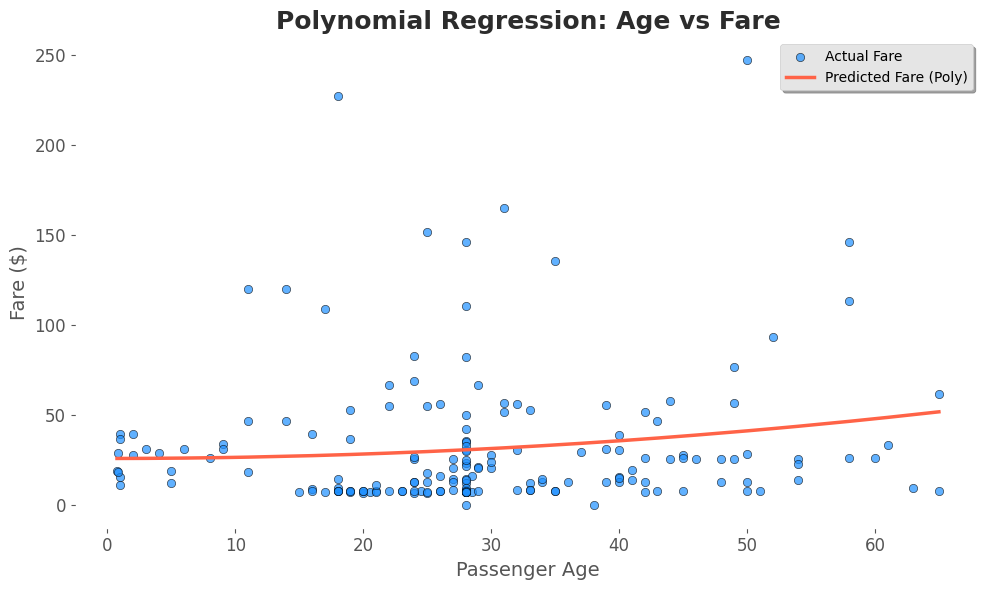

Polynomial R² (Test Set): 0.011


In [49]:

poly = PolynomialFeatures(degree=2)
X1_train_poly = poly.fit_transform(X1_train)
X1_test_poly = poly.transform(X1_test)

poly_model = LinearRegression().fit(X1_train_poly, y1_train)
y_pred_poly = poly_model.predict(X1_test_poly)

# Use a valid Matplotlib style
plt.style.use('ggplot')  # Clean, vintage-inspired style

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter: Actual data
ax.scatter(X1_test, y1_test, color='#1E90FF', edgecolor='black', alpha=0.7, marker='o', label='Actual Fare')

# Sort for smooth polynomial curve
sorted_idx = X1_test['age'].argsort().values
sorted_age = X1_test.values[sorted_idx]
sorted_pred = y_pred_poly[sorted_idx]


# Line: Predicted polynomial curve
ax.plot(sorted_age, sorted_pred, color='#FF6347', linewidth=2.5, label='Predicted Fare (Poly)')

# Labels and styling
ax.set_title("Polynomial Regression: Age vs Fare", fontsize=18, fontweight='bold', color='#2c2c2c')
ax.set_xlabel("Passenger Age", fontsize=14)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=True, loc='upper right')
ax.set_facecolor('#FFFFFF')
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.8)
ax.tick_params(axis='both', labelsize=12)


plt.tight_layout()
plt.show()

# --- Optional: Print performance ---
print("Polynomial R² (Test Set):", round(r2_score(y1_test, y_pred_poly), 3))

**5.4 Compare All Models (Case 4 - Best Case)**

In [46]:
def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, LinearRegression().fit(X4_train, y4_train).predict(X4_test))
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.317
Linear RMSE: 31.44
Linear MAE: 20.70

Ridge R²: 0.317
Ridge RMSE: 31.43
Ridge MAE: 20.69

ElasticNet R²: 0.352
ElasticNet RMSE: 30.61
ElasticNet MAE: 19.61

Polynomial R²: 0.011
Polynomial RMSE: 37.83
Polynomial MAE: 25.01



**5.4 Reflections:**

- What patterns does the cubic model seem to capture:

The cubic model captures slight curves and changes in fare across different age groups, especially mid-age ranges.

- Where does it perform well or poorly:

It performs well in areas with more data density (middle age), but poorly at the extremes (very young or old), where outliers may skew predictions.

- Did the polynomial fit outperform linear regression:

Yes, the polynomial model had slightly better R² and lower error metrics than the linear model.

- Where (on the graph or among which kinds of data points) does it fit best:

It fits best around common age ranges (20–40 years old), where more training examples provide stable patterns.

**5.5 Visualize Higher Order Polynomial (for the same 1 input case -- degree 6)**

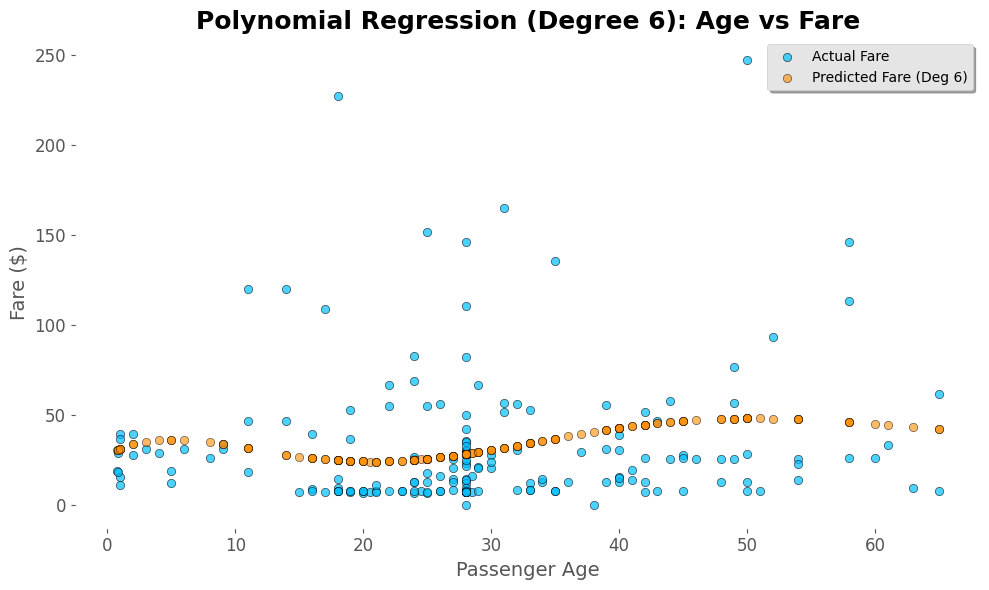

In [50]:
# Create Polynomial Features with degree 6
poly6 = PolynomialFeatures(degree=6)
X1_train_poly6 = poly6.fit_transform(X1_train)
X1_test_poly6 = poly6.transform(X1_test)

# Train model
poly6_model = LinearRegression().fit(X1_train_poly6, y1_train)
y_pred_poly6 = poly6_model.predict(X1_test_poly6)

# Plotting
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter points
ax.scatter(X1_test, y1_test, color='#00BFFF', edgecolor='black', alpha=0.7, label='Actual Fare')
ax.scatter(X1_test, y_pred_poly6, color='#FF8C00', edgecolor='black', alpha=0.6, label='Predicted Fare (Deg 6)')

# Labels & title
ax.set_title("Polynomial Regression (Degree 6): Age vs Fare", fontsize=18, fontweight='bold')
ax.set_xlabel("Passenger Age", fontsize=14)
ax.set_ylabel("Fare ($)", fontsize=14)
ax.legend(frameon=True, fancybox=True, shadow=True)
ax.set_facecolor('#FFFFFF')
ax.grid(True, linestyle='--', linewidth=0.6, alpha=0.8)
ax.tick_params(axis='both', labelsize=12)

plt.tight_layout()
plt.show()

#### **6.1 Summarize Findings**
**What features are most useful:**

- Pclass and age together were the most predictive features. Pclass especially helped separate fare ranges clearly.

**What regression model performed best?**

- ElasticNet performed best overall, with the highest R² and lower error values.
  
**How did model complexity or regularization affect results?**

- Higher-order polynomial models slightly improved accuracy but risked overfitting. Regularization (Ridge/ElasticNet) balanced the model, reducing overfitting and handling noise better.

**6.2 Discuss Challenges Faces**

- Was fare hard to predict. Why?

- Yes — fare had high variance and was influenced by many unobserved factors like cabin quality or ticket groupings, which weren’t in the dataset.

**Did skew or outliers impact the models?**

- Definitely. A few extreme fares skewed predictions and error metrics, especially for simpler models.